In [1]:
import glob
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Replay

In [12]:
date = "2022-03-22"

def gc_key(file):
    PR_str = file.split("/")[-2].split("-")
    return int(PR_str[1]), PR_str[3] + "-" + PR_str[2]

files = sorted(glob.glob(f"../nextflow/results/{date}/gctrees/PR*/gctree.p"), key=gc_key)
trees = {"_".join(f"{x}{y}" for x, y in zip(("mouse", "GC"), gc_key(file))): pickle.load(open(file, "rb"))
         for file in files}

print(f"loaded {len(trees)} GC trees")

loaded 77 GC trees


In [13]:
dat = []
for gc, tree in trees.items():
#     if gc.startswith("mouse7") or gc.startswith("mouse8"):
#         print(f"excluding 10-week mouse {gc}")
#     else:
        for node in tree.tree.traverse():
#             if node.abundance:
                dat.append([gc, node.name, len(node.mutations), ",".join(node.mutations), node.delta_bind])
    
df = pd.DataFrame(dat, columns=("GC", "seq_id", "number of AA mutations", "mutations", "additive affinity effects"))
df

,GC,seq_id,number of AA mutations,mutations,additive affinity effects
0,mouse1_GC1-RP,naive,0,,0.00000
1,mouse1_GC1-RP,seq50,3,"Y103(H)F,S20(L)N,L112(L)P",-0.06082
2,mouse1_GC1-RP,seq46,9,"E51(H)G,Y52(H)F,Y66(L)N,V71(L)I,D74(L)A,Q95(L)...",-3.45668
3,mouse1_GC1-RP,seq55,1,Y58(H)D,-0.80796
4,mouse1_GC1-RP,31,4,"N40(H)H,N108(L)D,Y110(L)S,E121(L)Q",-7.71074
...,...,...,...,...,...
5600,mouse8_GC89-LB,seq50,12,"Y87(H)F,A100(H)G,A105(H)G,M11(L)L,Y42(L)I,D74(...",1.27033
5601,mouse8_GC89-LB,seq41,10,"D28(H)V,S57(H)N,I76(H)F,A105(H)G,A52(L)P,Q105(...",2.44001
5602,mouse8_GC89-LB,seq57,7,"D28(H)V,I76(H)F,A105(H)G,Q105(L)H,N108(L)K,S10...",2.55742
5603,mouse8_GC89-LB,seq24,10,"D28(H)V,G63(H)D,T65(H)I,I76(H)F,A105(H)G,Q105(...",2.25479


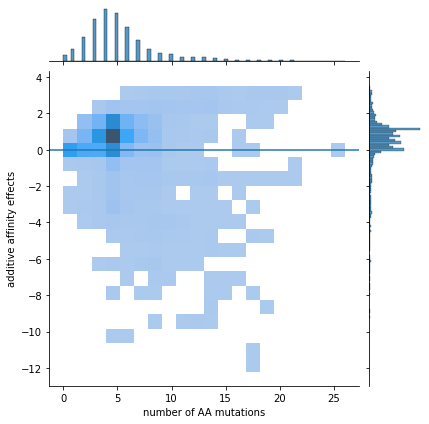

In [14]:
g = sns.jointplot(data=df, x="number of AA mutations", y="additive affinity effects", kind="hist", joint_kws=dict(bins=20))
g.ax_joint.axhline(0)
plt.show()

## DMS

In [15]:
dms_df = pd.read_csv("https://media.githubusercontent.com/media/jbloomlab/Ab-CGGnaive_DMS/main/results/final_variant_scores/final_variant_scores.csv", index_col="mutation", dtype=dict(position_IMGT=pd.Int16Dtype()))
# remove linker sites
dms_df = dms_df[dms_df.chain != "link"]
# add indicator for wildtype data
dms_df["WT"] = dms_df.wildtype == dms_df.mutant
assert dms_df.position_IMGT.max() < 1000
dms_df["site"] = [f"{chain}-{str(pos).zfill(3)}" for chain, pos in zip(dms_df.chain, dms_df.position_IMGT)]
dms_df

,target,wildtype,position,position_IMGT,chain,mutant,codon,single_nt,bind,delta_bind,...,expr,delta_expr,n_bc_expr,n_libs_expr,psr,delta_psr,n_bc_psr,n_libs_psr,WT,site
mutation,,,,,,,,,,,,,,,,,,,,,
E1(H)A,CGG_naive,E,1,1,H,A,GAG,True,10.48829,0.03110,...,10.44614,-0.00453,19.0,2.0,6.78608,-0.07452,17.0,2.0,False,H-001
E1(H)C,CGG_naive,E,1,1,H,C,GAG,False,10.44477,-0.01243,...,10.32364,-0.12703,20.0,2.0,7.44234,0.58174,17.0,2.0,False,H-001
E1(H)D,CGG_naive,E,1,1,H,D,GAG,True,10.42771,-0.02948,...,10.51618,0.06551,16.0,2.0,6.95940,0.09880,13.0,2.0,False,H-001
E1(H)E,CGG_naive,E,1,1,H,E,GAG,True,10.45719,0.00000,...,10.45067,0.00000,21170.0,2.0,6.86060,0.00000,18910.0,2.0,True,H-001
E1(H)F,CGG_naive,E,1,1,H,F,GAG,False,10.51899,0.06180,...,10.33163,-0.11904,24.0,2.0,6.91372,0.05313,21.0,2.0,False,H-001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R124(L)S,CGG_naive,R,235,124,L,S,CGT,True,10.44756,-0.00963,...,10.54313,0.09246,39.0,2.0,6.93925,0.07866,33.0,2.0,False,L-124
R124(L)T,CGG_naive,R,235,124,L,T,CGT,False,10.43023,-0.02696,...,10.53860,0.08793,36.0,2.0,6.88956,0.02896,34.0,2.0,False,L-124
R124(L)V,CGG_naive,R,235,124,L,V,CGT,False,10.38231,-0.07488,...,10.48707,0.03640,27.0,2.0,6.78160,-0.07899,24.0,2.0,False,L-124


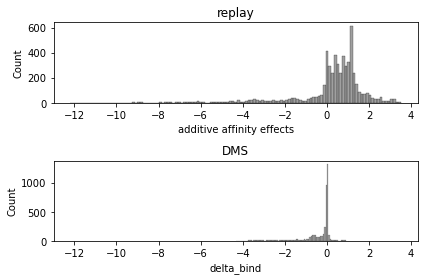

In [16]:
plt.subplot(211)
ax = sns.histplot(data=df, x="additive affinity effects", color="grey")
plt.title("replay")
plt.subplot(212, sharex=ax)
sns.histplot(data=dms_df, x="delta_bind", color="grey")
plt.title("DMS")
plt.tight_layout()
plt.show()

In [17]:
quantiles = df["additive affinity effects"].quantile(np.linspace(0, 1, 30))
quantiles

0.000000   -12.195310
0.034483    -3.912810
0.068966    -2.551178
0.103448    -1.451396
0.137931    -0.578792
0.172414    -0.158313
0.206897    -0.027203
0.241379     0.008573
0.275862     0.091662
0.310345     0.170179
0.344828     0.290349
0.379310     0.331000
0.413793     0.380047
0.448276     0.510581
0.482759     0.571646
0.517241     0.685008
0.551724     0.756925
0.586207     0.824025
0.620690     0.875731
0.655172     0.989771
0.689655     1.072740
0.724138     1.120735
0.758621     1.171457
0.793103     1.196820
0.827586     1.237405
0.862069     1.360510
0.896552     1.550806
0.931034     1.891081
0.965517     2.377966
1.000000     3.517890
Name: additive affinity effects, dtype: float64

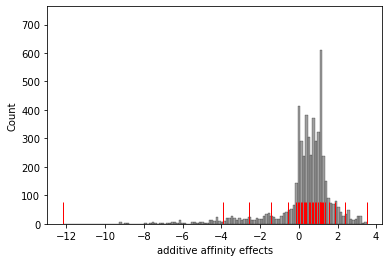

In [18]:
sns.histplot(data=df, x="additive affinity effects", color="grey")
sns.rugplot(x=quantiles, height=0.1, color="red")
plt.show()

In [19]:
idxs = []

for q in quantiles:
    closest = np.inf
    for i in range(len(df)):
        delta = abs(df.loc[i, "additive affinity effects"] - q)
        if delta < closest:
            closest = delta
            closest_i = i
    idxs.append(closest_i)

df.loc[idxs].to_csv("/Users/wdewitt/Downloads/quantile_design.csv")
df.loc[idxs]

,GC,seq_id,number of AA mutations,mutations,additive affinity effects
5342,mouse8_GC87-LI,seq1,18,"I30(H)V,T35(H)S,F45(H)I,L50(H)F,Y52(H)F,M53(H)...",-12.19531
3310,mouse3_GC66-LA,seq58,8,"N48(H)S,Y55(H)F,S57(H)N,S64(H)N,Y87(H)S,A52(L)...",-3.91175
4728,mouse6_GC75-RP,seq36,2,"A105(H)G,I91(L)H",-2.54921
3106,mouse3_GC58-LB,seq26,10,"L50(H)I,Y66(H)N,A105(H)G,T37(L)S,K51(L)Q,Q95(L...",-1.45116
790,mouse1_GC20-LB,seq39,3,"I30(H)F,S57(H)N,K51(L)E",-0.57813
1261,mouse1_GC6-LP,19,5,"T96(H)S,Y103(H)F,N28(L)I,Y42(L)H,L112(L)P",-0.16036
674,mouse1_GC19-LB,seq57,6,"E1(H)D,S64(H)N,A105(H)G,G36(L)N,R67(L)K,K119(L)N",-0.02759
3558,mouse4_GC50-LP,seq34,5,"S36(H)N,I78(H)L,N92(H)T,Y42(L)C,S92(L)T",0.00849
1980,mouse2_GC30-RB,seq26,6,"D28(H)A,N40(H)C,T96(H)I,G36(L)D,A40(L)S,S92(L)T",0.09164
4288,mouse5_GC80-LP,seq78,3,"S64(H)N,Y42(L)N,S49(L)A",0.17008


## Tatsuya's designs

final design choices

In [38]:
df_designed = pd.read_csv("220331.2_Variants_to_produce.csv")
df_designed.Category = df_designed.Category.str.split(":").str[0].str.replace('"', "").str.replace("mouse 1", "").str.replace("mouse 2", "")
df_designed

,Fab #,Category,PR,HK_key_mouse,HK_key_node,HK_key_gc,HK_key_cell_type,name,parent_name,abundance,...,IgK_nt_sequence,IgK_aa_sequence,delta_bind,delta_expr,delta_psr,LC_prefix_twist,LC_insert_twist,HC_prefix_twist,HC_suffix_twist,HC_insert_twist
0,1,Uniform ladder,PR1.6,8.0,LI,87.0,GC,seq46,51,1.0,...,GACATTGTGATGACTCAGTCTCAAGAATTCATGTCCACGTCAGTAG...,DIVMTQSQEFMSTSVGDRVSVTCKASQNVGTDVAWYQQKPGQSPKA...,-12.19531,-0.69039,2.17393,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAGAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
1,2,Uniform ladder,PR1.5,8.0,LP,85.0,GC,seq36,11,2.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWFQQKPGHSPKA...,-9.15380,-0.97991,2.38985,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
2,3,Uniform ladder,PR1.7,2.0,RB,28.0,GC,seq35,18,1.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,-7.52469,-0.55500,0.84990,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
3,4,Uniform ladder,PR1.5,8.0,RI,86.0,GC,seq6,seq35,1.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVETNVAWFQQKPGQSPKA...,-5.32024,-0.73088,2.19250,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
4,5,Uniform ladder,PR1.2,4.0,LI,73.0,GC,seq32,26,1.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWNQQKPGQSPKA...,-3.07380,-1.33981,0.57563,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
5,6,Uniform ladder,PR1.3,3.0,LP,46.0,GC,seq51,seq23,1.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGINVAWYQQKPGQSPKA...,-1.41357,-1.84166,0.87274,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
6,7,Uniform ladder,PR1.7,1.0,RB,12.0,GC,seq21,3,1.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,1.50696,0.11229,0.16275,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
7,8,Uniform ladder,PR1.6,8.0,RP,84.0,GC,seq62,seq40,1.0,...,GACATTGTAATGACTCAGTCTCAAAAATTCATGTCCACATCAGAAG...,DIVMTQSQKFMSTSEGDRVSVTCKASQDVGTNVAWYQEKPGQSPKA...,2.19166,-0.08753,0.72645,GTACATTCC,GTACATTCCGACATTGTAATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
8,9,Uniform ladder,PR1.5,8.0,LB,89.0,GC,seq67,40,1.0,...,GACATTGTGATGACTCAGTCTCAAAAACTCATGTCCACATCAGTAG...,DIVMTQSQKLMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,2.70218,0.05960,-0.10394,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAACTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
9,10,Uniform ladder,PR1.5,8.0,RI,86.0,GC,18,53,0.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGCAG...,DIVMTQSQKFMSTSAGDRVSVTCKASQNVGTNVGWYQQKPGQSPKA...,3.51789,0.28299,-0.06213,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...


Note: High potential are missing phenotype info

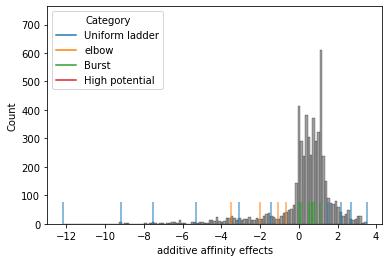

In [45]:
sns.histplot(data=df, x="additive affinity effects", color="grey")
sns.rugplot(data=df_designed, x="delta_bind", hue="Category", height=0.1, lw=2)
plt.show()